In [1]:
#=======================================Created by Rahul Agarwal===========================================
import os
import glob
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
log_data = []
folder = 'LogFiles/'
for root, dirs, files in os.walk(folder):
    for file in files:
        if file.endswith(".log"):
            file_path = os.path.join(root, file)
            with open(file_path, "r") as f:
                for line in f:
                    match = re.match(r'(\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2}),(\w+),(\w+),({.+})', line)
                    if match:
                        timestamp, code, event_id, payload = match.groups()
                        try:
                            payload_json = json.loads(payload)
                            nested_json = json.loads(payload_json["b64Payload"])

                            log_data.append([
                                timestamp, code, event_id,
                                payload_json["MessageCode"],
                                payload_json["EventId"],
                                payload_json["EventTime"],
                                payload_json["IngestTime"],
                                nested_json["requestId"],
                                nested_json["sourceIp"],
                                nested_json["httpMethod"],
                                nested_json["httpUrl"],
                                nested_json["httpAuth"],
                                nested_json["httpAuthHash"],
                                nested_json["resource"],
                                nested_json["resourceClass"],
                                nested_json["resourceMethod"],
                                nested_json["organization"],
                                nested_json["app"],
                                nested_json["user"],
                                nested_json["entity"],
                                nested_json["timestamp_req"],
                                nested_json["timestamp_resp"]
                            ])
                        except (ValueError, KeyError):
                            print(f"Failed to parse payload: {payload}")
                    else:
                        print("No match found")

df = pd.DataFrame(log_data, columns=["Time Stamp", "Code", "Event ID", "Message Code", "Event ID", "Event Time", "Ingest Time", 
                                     "Request ID", "Source IP", "HTTP Method", "HTTP Url", "HTTP Auth", "HTTP Auth Hash", 
                                     "Resource", "Resource Class", "Resource Method", "Organization", "App", "User", "Entity", 
                                     "Timestamp Request", "Timestamp Response"])
print(df.head())
#=======================================Created by Rahul Agarwal===========================================

            Time Stamp       Code                    Event ID Message Code  \
0  2022-12-20 23:59:57  DDV1_HTTP   1K6I11BQJXAZ5GATCAT7NAQK6    DDV1_HTTP   
1  2022-12-20 23:59:57  DDV1_HTTP   506MQMEOM1J51MJGM0Y8DJW75    DDV1_HTTP   
2  2022-12-20 23:59:57  DDV1_HTTP    BEFYAYKLU6TGR0VBME6W793N    DDV1_HTTP   
3  2022-12-20 23:59:57  DDV1_HTTP  1FLBE1RBUZ14L1N5BB5WMK0HXN    DDV1_HTTP   
4  2022-12-20 23:59:57  DDV1_HTTP    ZKVYGLLSDYM1VOVCYZ682ODU    DDV1_HTTP   

                     Event ID                  Event Time  \
0   1K6I11BQJXAZ5GATCAT7NAQK6  2022-12-20T23:59:40.072906   
1   506MQMEOM1J51MJGM0Y8DJW75  2022-12-20T23:59:41.122752   
2    BEFYAYKLU6TGR0VBME6W793N  2022-12-20T23:59:41.845658   
3  1FLBE1RBUZ14L1N5BB5WMK0HXN  2022-12-20T23:59:42.237494   
4    ZKVYGLLSDYM1VOVCYZ682ODU    2022-12-20T23:59:42.3797   

                    Ingest Time                  Request ID      Source IP  \
0  2022-12-20T23:59:57.1959139Z   1K6I11BQJXAZ5GATCAT7NAQK6  62.48.164.172   
1  2022-

In [2]:
df.dtypes

Time Stamp            object
Code                  object
Event ID              object
Message Code          object
Event ID              object
Event Time            object
Ingest Time           object
Request ID            object
Source IP             object
HTTP Method           object
HTTP Url              object
HTTP Auth             object
HTTP Auth Hash        object
Resource              object
Resource Class        object
Resource Method       object
Organization          object
App                   object
User                  object
Entity                object
Timestamp Request     object
Timestamp Response    object
dtype: object

In [4]:
print("Shape:", df.shape)

Shape: (6194985, 22)


In [2]:
#=======================================Created by Fnu Abhishek===========================================
columns_to_drop = ['Time Stamp', 'Event ID', 'Message Code', 'Code', 'Request ID', 'HTTP Auth Hash', 'Resource Class', 
                   'Resource Method', 'Entity', 'App', 'User']  
df_clean = df.drop(columns=columns_to_drop)
#===================================================================================================

In [8]:
#=================================Created by Rahul Agarwal================================================
missing_values = df_clean.isnull().sum()
print("Missing Values:\n", missing_values)
#==========================================================================================================

Missing Values:
 Event Time                 0
Ingest Time                0
Source IP                  0
HTTP Method                0
HTTP Url                   0
HTTP Auth                  0
Resource              403440
Organization          403453
Timestamp Request          0
Timestamp Response         0
dtype: int64


In [3]:
#============================================Drop Missing Values created by Rahul Agarwal===========================================
df_clean.dropna(inplace=True)
print("Shape:", df_clean.shape)
#==========================================================================================================

Shape: (6142116, 10)


In [7]:
#=====================Created by Rahul Agarwal===============================================
# Define datatypes:
dtypes = {'Event Time': 'datetime64[ns]',
          'Ingest Time': 'datetime64[ns]',
          'Timestamp Request': 'datetime64[ns]',
          'Timestamp Response': 'datetime64[ns]'}

# Convert the columns to their respective datatypes:
df_clean = df_clean.astype(dtypes)
df_clean.dtypes
df1 = df_clean
#====================================================================================================

Event Time            datetime64[ns]
Ingest Time           datetime64[ns]
Source IP                     object
HTTP Method                   object
HTTP Url                      object
HTTP Auth                     object
Resource                      object
Organization                  object
Timestamp Request     datetime64[ns]
Timestamp Response    datetime64[ns]
dtype: object

In [8]:
# Create a new column for the response time between 'Timestamp Response' and 'Timestamp Request'
df_clean['Response_Time'] = df_clean['Timestamp Response'] - df_clean['Timestamp Request']

In [ ]:
#=============================Created by Ziqi zhu================================================
df.to_csv('df.csv', index=False)
#======================================================================================================

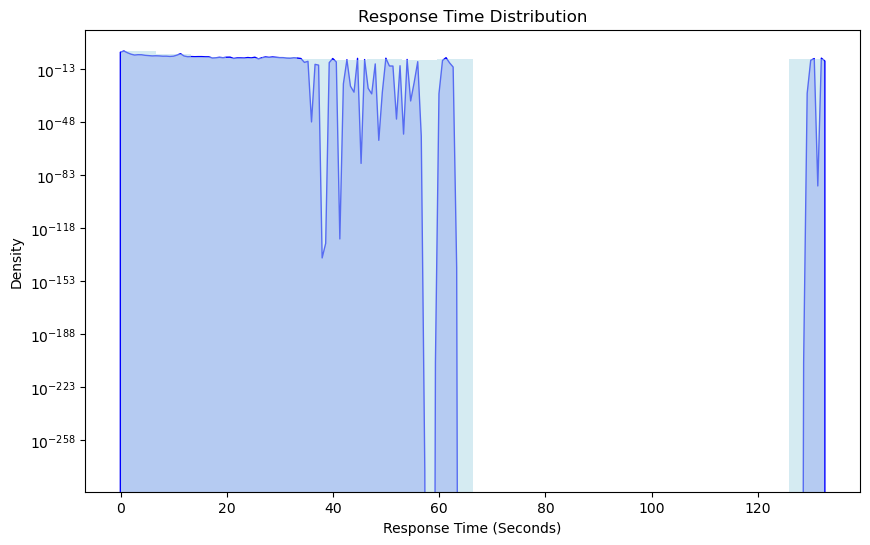

In [41]:
# EDA 2: Response Time Distribution in Seconds:
import matplotlib.pyplot as plt
import seaborn as sns
# Convert response time to seconds
df1['Response_Time_Seconds'] = df1['Response_Time'].dt.total_seconds()

# Plotting response time distribution
fig, ax = plt.subplots(figsize=(10, 6))

# Create a density plot
sns.kdeplot(df1['Response_Time_Seconds'], shade=True, color='blue', ax=ax)

# Create a histogram with logarithmic scale on the y-axis
ax.hist(df1['Response_Time_Seconds'], bins=20, alpha=0.5, density=True, log=True, color='lightblue')

plt.xlabel('Response Time (Seconds)')
plt.ylabel('Density')
plt.title('Response Time Distribution')

plt.show()